In [14]:
!pip install xlrd
!pip install psycopg2
!pip install geneticalgorithm

In [15]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

In [16]:
C=[[0.98542616, 0.00355154, 0.23577112],
   [0.98118001, 0.97827545, 0.97767346],  
   [0.99995232, 0.46368973, 0.58337075]]
 
beta1 = 0.79832491
epsilon = 0.79
tau = sigma_inversa = 5
N1 = 2135096
N2 = 5894253
N3 = 1001685

S1 = 2135096
S2 = 5894253
S3 = 1001685

C11 = C[0][0]
C12 = C[0][1]
C13 = C[0][2]
C21 = C[1][0]
C22 = C[1][1]
C23 = C[1][2]
C31 = C[2][0]
C32 = C[2][1]
C33 = C[2][2]

In [17]:
def opt(v):
  v1,v2,v3 = v 
  if (N1*v1 + N2*v2 + N3*v3 > 1e6):  return 190000
  K = np.array([[beta1*tau*(1-epsilon*v1)*S1*C11/N1 , beta1*tau*(1-epsilon*v1)*S1*C12/N2 , beta1*tau*(1-epsilon*v1)*S1*C13/N3],
                [beta1*tau*(1-epsilon*v2)*S2*C21/N1 , beta1*tau*(1-epsilon*v2)*S2*C22/N2 , beta1*tau*(1-epsilon*v2)*S2*C23/N3],
                [beta1*tau*(1-epsilon*v3)*S3*C31/N1 , beta1*tau*(1-epsilon*v3)*S3*C32/N2 , beta1*tau*(1-epsilon*v3)*S3*C33/N3]])
        
  valores = np.linalg.eigvals(K)
        
  i=0
  j=1
  cont=0
  while i+j < 2:
    if valores[i] > valores[i+j]:
      eigen=valores[i]
      j=j+1
      cont=cont+1
    else:
      eigen=valores[i+j]
      i=i+cont+1
      j=1
      cont=0
  return eigen

 The best solution found:
 [0.00246177 0.00130043 0.98516403]

 Objective function:
 4.88894731353871


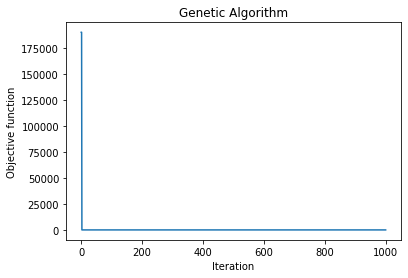

[190000.0, 190000.0, 6.413128200152546, 6.413128200152546, 6.033754074146254, 6.033754074146254, 6.033754074146254, 5.855508863220379, 5.855508863220379, 5.855508863220379, 5.855508863220379, 5.855508863220379, 5.855508863220379, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.772290327820972, 5.083217767889992, 5.083217767889992, 5.080063976070171, 5.080063976070171, 5.080063976070171, 5.080063976070171, 5.080063976070171, 5.080063976070171, 5.080063976070171, 5.080063976070171, 5.080063976070171, 5.080063976070171, 5.08006397

In [18]:
a = np.array([[[0,1]]*3])
varbound= np.array(a[0])


algorithm_param = {'max_num_iteration': 1000,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=opt,dimension=3,variable_type='real',variable_boundaries=varbound,algorithm_parameters=algorithm_param)

model.run()

convergence=model.report
print(convergence)
#solution=model.output_dict
#print(solution